# Gradient Descent Visualizaiton

In this tutorial we create a simple linear regression and visualize its progress. The code can be used for higher dimensions with small modifications. This version is specifically a 2D version because we want to visualize it. 

Stochastic gradient descent requires two parameters:

- Learning Rate: Used to limit the stepsize of updating parameteres in each timestep.
- Epochs: The number of times to run through the training data while updating the parameters.

In [2]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib notebook

In [7]:
X = np.linspace(0,10,30).reshape(30,1)
#print X
y = X + 2*np.random.normal(size=X.shape)
#print y
theta = np.zeros((1,X.shape[1]+1))

<IPython.core.display.Javascript object>


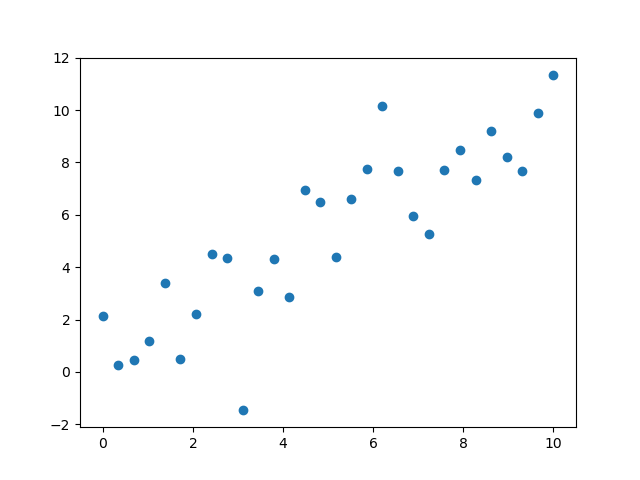

In [8]:
plot = plt.scatter(X,y)

In [ ]:
# linear model
def h_theta(X , theta):
    # append 1 for bias term
    X_bias = np.append(X,np.ones((X.shape[0],1)),axis=1)
    # calculate aX + b
    yhat = np.dot(X_bias,theta.T)
    return yhat

# mean square error
def MSE(y, X, theta, h_theta):
    m = y.size
    yhat = h_theta(X , theta)
    error = np.sum((yhat - y)**2)/(2*m)
    return error

# gradient descent
def MSE_GD(X, y, h_theta, theta, l_rate=0.0001):
    # number of samples
    m = len(y)
    # append 1 for bias term
    X_bias = np.append(X,np.ones((X.shape[0],1)),axis=1)
    yhat = h_theta(X , theta)
    distance = yhat - y
    gradient = np.dot(distance.T , X_bias)/float(m)
    theta = theta - l_rate*gradient
    return theta

Here we use [SciKit-Learn](http://scikit-learn.org/stable/) library to do the task. We use this to compare our work from scratch to the results provided by a ML library.

In [ ]:
# import the scikit-learn library
from sklearn import linear_model

# create a linear regression model
model = linear_model.LinearRegression()

# fit the model to the data
model.fit(X,y)

# return the mean square error after training
def skl_MSE(X,y):
    m = y.size
    yhat = model.predict(X)
    error = np.sum((yhat - y)**2)/(2*m)
    return error

# print the error
print('The error given by scikit-learn is equal to: ',skl_MSE(X,y))

In [ ]:
# Set the usual figure parameters and add some styling
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xticks([])
plt.yticks([])

yhat = h_theta(X , theta)
line, = plt.plot(X, yhat , label='SGD', alpha=0.6, color='Purple', linewidth=2)
plt.plot(X, model.predict(X), label='sklearn',
         alpha=0.6, color='Red', linewidth=2)
scat = plt.scatter(X, y, s=30, alpha=0.6, edgecolors='none')
ttl = ax.text(0.35, 0.95, 'MSE = '+ str(MSE(y,X,theta,h_theta)),
              transform = ax.transAxes, va='center')
plt.legend(loc='upper left', frameon=False)

# update the line object
def update_func(frame_number):
    global theta
    theta = MSE_GD(X, y, h_theta, theta)
    ttl.set_text('MSE = '+ str(MSE(y,X,theta,h_theta)))
    line.set_ydata(h_theta(X , theta))

# animate
anim = animation.FuncAnimation(fig, update_func, frames=10000, interval=50, repeat=False)